In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset
df_main = pd.read_csv("files/Mental-Health-Dataset.csv")
df_main.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


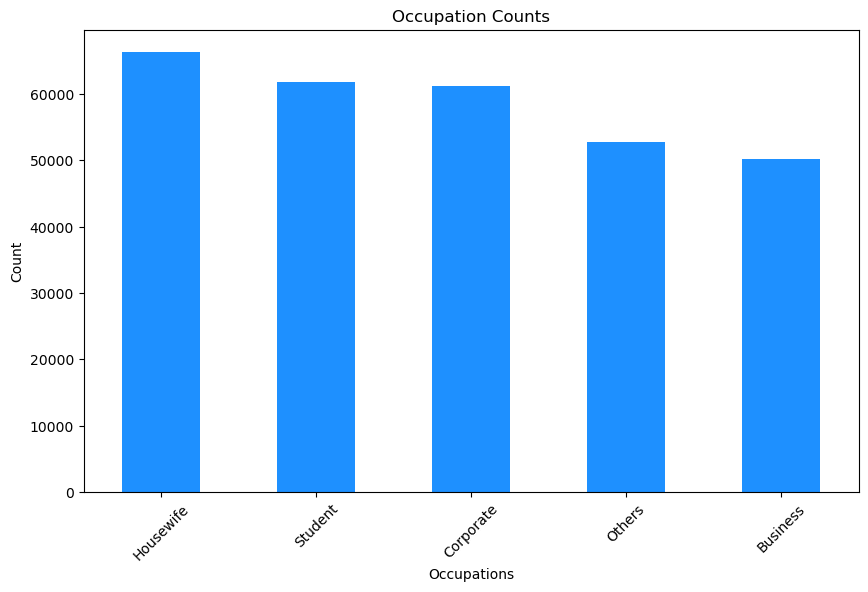

In [3]:
#determine percentage of unique occupations
occupation_count = df_main['Occupation'].value_counts()

#occupation_count.plot(kind='pie', )

plt.figure(figsize=(10, 6))
occupation_count.plot(kind='bar', color='dodgerblue')
plt.title('Occupation Counts')
plt.xlabel('Occupations')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [4]:
mental_health_history = pd.DataFrame(df_main['Mental_Health_History'].value_counts())
mental_health_history

,count
Mental_Health_History,
No,104018
Maybe,95378
Yes,92968


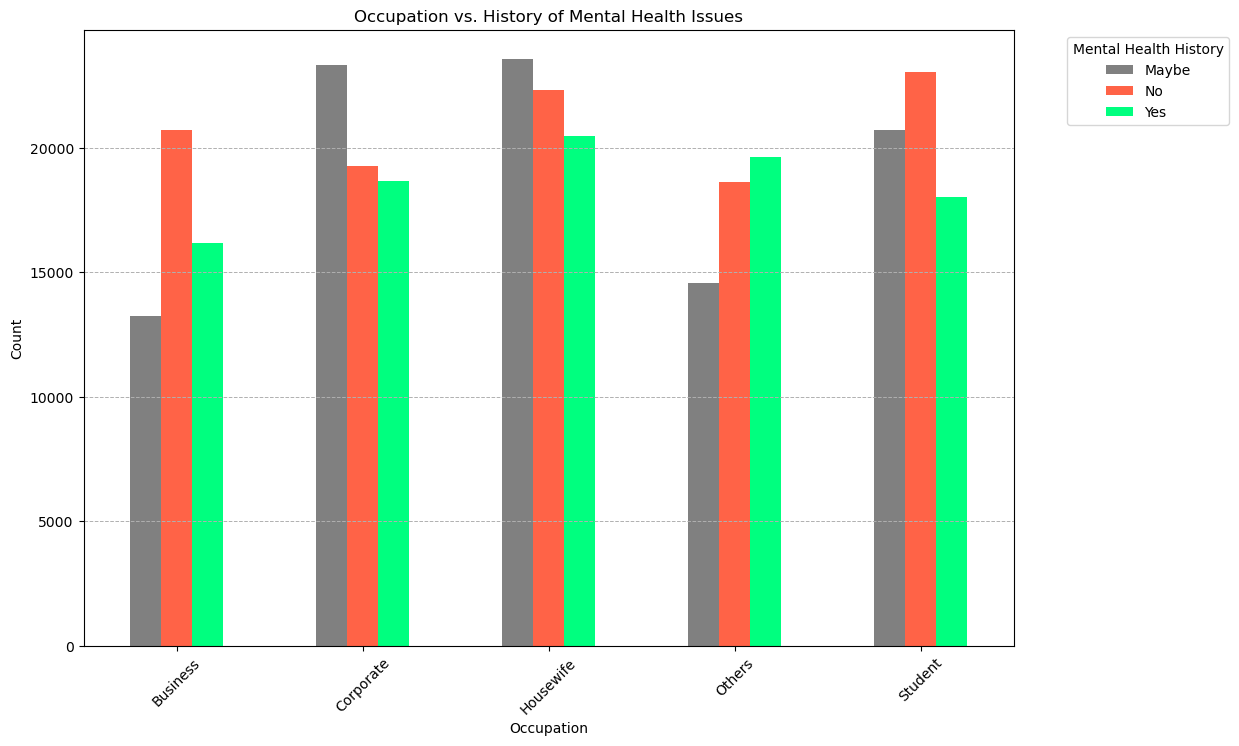

Mental_Health_History,Maybe,No,Yes
Occupation,,,
Business,13228,20729,16192
Corporate,23310,19267,18652
Housewife,23552,22322,20477
Others,14579,18642,19620
Student,20709,23058,18027


In [5]:
# Grouping by 'Occupation' and 'Mental_Health_History', then counting occurrences
occupation_mh_counts = df_main.groupby(['Occupation', 'Mental_Health_History']).size().unstack(fill_value=0)

# Plotting the data
occupation_mh_counts.plot(kind='bar', figsize=(12, 8), color=['grey', 'tomato', 'springgreen'])
plt.title('Occupation vs. History of Mental Health Issues')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend(title='Mental Health History', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

occupation_mh_counts

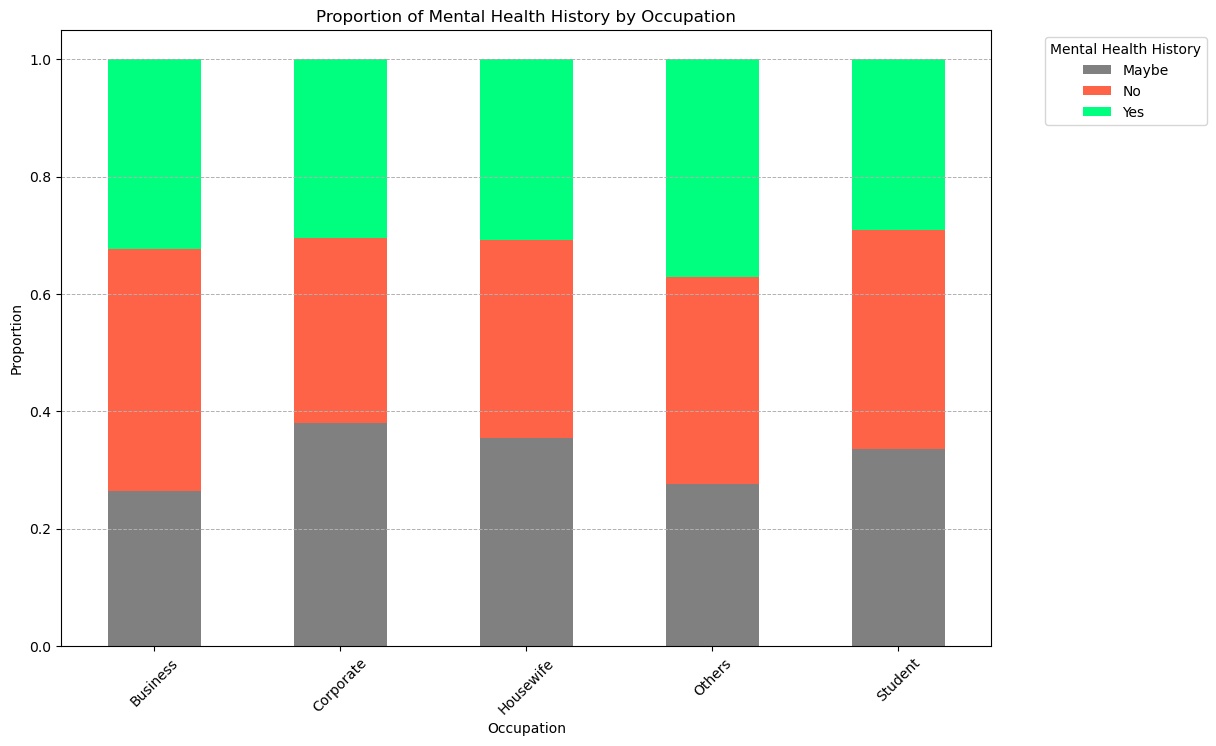

Mental_Health_History,Maybe,No,Yes
Occupation,,,
Business,0.263774,0.413348,0.322878
Corporate,0.380702,0.314671,0.304627
Housewife,0.354961,0.336423,0.308616
Others,0.275903,0.352794,0.371303
Student,0.335130,0.373143,0.291727


In [6]:
# Grouping by 'Occupation' and 'Mental_Health_History', then counting occurrences
occupation_mh_counts = df_main.groupby(['Occupation', 'Mental_Health_History']).size().unstack(fill_value=0)

# Normalize the counts to proportions
occupation_mh_proportions = occupation_mh_counts.div(occupation_mh_counts.sum(axis=1), axis=0)

# Plotting the proportions
occupation_mh_proportions.plot(kind='bar', stacked=True, figsize=(12, 8), color=['grey', 'tomato', 'springgreen'])
plt.title('Proportion of Mental Health History by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend(title='Mental Health History', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

occupation_mh_proportions

In [7]:
from scipy.stats import chi2_contingency

# Perform Chi-Squared test
chi2_stat, p_val, dof, expected = chi2_contingency(occupation_mh_proportions)
print(f"Chi-Squared Statistic: {chi2_stat}")
print(f"P-value: {p_val}")

# Interpretation
if p_val < 0.05:
    print("There is a significant association between gender and mental health history.")
else:
    print("There is no significant association between gender and mental health history.")

Chi-Squared Statistic: 0.0594419312603835
P-value: 0.999999968251777
There is no significant association between gender and mental health history.


In [ ]:
# Interpretation:
# * The bar plots provide visual insights into the distribution of occupations and their corresponding mental health histories.
# * The stacked bar plot of proportions shows the relative distribution of mental health histories within each occupation.
# * The Chi-Squared test helps to statistically determine if there is a significant association between occupation and mental health history. Based on the p-value, it is concluded whether or not such an association exists.
# * This comprehensive analysis helps in understanding how mental health history varies across different occupations and whether these variations are statistically significant.
# * Chi-Squared test determined a value > 0.05, it indicates no significant association between Occupation and Mental Health. 
